# Final Project

Julia Kirk

## Introduction

The objective of this notebook is to analyze lobbying activities on healthcare bills in Colorado by identifying trends in lobbying involvement and understanding which bill topics attract the most attention. This notebook consolidates data from multiple sources, including:

- Healthcare-related bills from the 2024 Regular Session of the Colorado General Assembly website.
- Lobbying disclosures from CSV files downloaded from the Colorado Secretary of State website.

## Imports
- pandas: For storing and manipulating data in a tabular format
- seaborn: For creating visuals
- matplotlib: For creating visuals

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Loading Data

I loaded in three CSV datasets I created in module 2 and 3. These contain bigraphical infomation on congress people, health bills, and lobbying diclosures. This step also involved cleaning and modyfying the data for further analysis 

In [16]:
# create lobbying df
lobbyingDF = pd.read_csv("datasets/lobbying.csv")
lobbyingDF.head()

,Lobbyist,Client,Position,Start date,End date,Bill #,Subject
0,"Ward, Taylor Blake",Colorado Department of Public Health and Envir...,NaN,01/01/2024,08/12/2024,HB24-1106,Require Information about Abortion Pill Reversal
1,"Robinson, Anaya D",ACLU of Colorado,Opposing,03/04/2024,06/30/2024,HB24-1106,Require Information about Abortion Pill Reversal
2,"Morse Public Affairs, LLC",Adams County Health Department,Opposing,02/12/2024,06/30/2024,HB24-1106,Require Information about Abortion Pill Reversal
3,"Ruddock, Michael J",Adams County Health Department,Opposing,02/12/2024,06/30/2024,HB24-1106,Require Information about Abortion Pill Reversal
4,"MANDARICH, MARY ALICE",COBALT,Opposing,02/14/2024,06/30/2024,HB24-1106,Require Information about Abortion Pill Reversal


In [17]:
# create billsDF
billsDF = pd.read_csv("datasets/healthBills.csv")
# replace dates for true
billsDF['approved'] = billsDF['approved'].apply(lambda x: True if x != "False" else False)
billsDF['effective'] = billsDF['effective'].apply(lambda x: True if x != "False" else False)
billsDF['vetoed'] = billsDF['vetoed'].apply(lambda x: False if x == "False" else True)
# get value counts from lobbying and add it to df
billCount = lobbyingDF['Bill #'].value_counts().reset_index()
billCount.columns = ['Bill #', 'Count']
# join the new dataframe to the old one
billsDF = billsDF.merge(billCount, on='Bill #', how='left')
billsDF['Count'] = billsDF['Count'].fillna(0).astype(int)
#order by count
billsDF = billsDF.sort_values(by='Count', ascending=False).reset_index(drop=True)
billsDF.head()

,billName,longTitle,Bill #,session,subjects,primeSponsors,committees,summary,approved,effective,vetoed,Count
0,Prevent Workplace Violence in Health-Care Sett...,Concerning methods to prevent workplace violen...,HB24-1066,2024 Regular Session,"['Health Care & Health Insurance', 'Labor & Em...","['Eliza Hamrick', 'Lorena García', 'Dafna Mich...","{'House': ['Health & Human Services', 'Appropr...","The bill enacts the ""Violence Prevention in He...",False,False,False,214
1,Analysis of Universal Health-Care Payment System,Concerning consideration of a statewide univer...,HB24-1075,2024 Regular Session,"['Health Care & Health Insurance', 'Insurance'...","['Karen McCormick', 'Andrew Boesenecker', 'Jan...","{'House': ['Health & Human Services', 'Appropr...",The bill requires the Colorado school of publi...,False,False,False,207
2,Prior Authorization Requirements Alternatives,Concerning modifications to requirements for p...,HB24-1149,2024 Regular Session,"['Subject:', 'Health Care & Health Insurance']","['Shannon Bird', 'Lisa Frizell', 'Dylan Robert...","{'House': ['Health & Human Services', 'Appropr...",With regard to prior authorization requirement...,True,True,False,166
3,Treatment for Substance Use Disorders,Concerning treatment for substance use disorde...,HB24-1045,2024 Regular Session,"['Subject:', 'Health Care & Health Insurance']","['Ryan Armagost', 'Chris deGruy Kennedy', 'Kyl...","{'House': ['Health & Human Services', 'Finance...",The act prohibits an insurance carrier that pr...,True,True,False,163
4,Protect Privacy of Biological Data,Concerning protecting the privacy of individua...,HB24-1058,2024 Regular Session,"['Subject:', 'Health Care & Health Insurance']","['Cathy Kipp', 'Matt Soper', 'Mark Baisley', '...","{'House': ['Judiciary'], 'Senate': ['Business,...","In 2021, the general assembly enacted Senate B...",True,True,False,158


In [18]:
# make dataframe of representives
repsDF = pd.read_csv('datasets/regular2024.csv')
repsDF.head()

,Name,Occupation,Leadership Position,Party,Committee Assignments,Mailing Address,Capitol Phone,Email,District Number
0,Steve Fenberg,NaN,President of the Senate,Democrat,Executive Committee of the Legislative Council...,"200 E Colfax None, Denver, CO 80203, United St...",303-866-4872,stephen.fenberg.senate@coleg.gov,18
1,Karen McCormick,Veterinarian,NaN,Democrat,"Agriculture, Water & Natural Resources, Health...","200 E Colfax RM 307, Denver, CO 80203, United ...",303-866-2780,karen.mccormick.house@coleg.gov,11
2,Mike Lynch,NaN,NaN,Republican,"Agriculture, Water & Natural Resources, Busine...","200 E Colfax RM 307, Denver, CO 80203, United ...",303-866-2907,mike.lynch.house@coleg.gov,65
3,Jennifer Bacon,NaN,Assistant Majority Leader,Democrat,"Judiciary, Education","200 E Colfax RM 307, Denver, CO 80203, United ...",303-866-2909,jennifer.bacon.house@coleg.gov,7
4,Tony Exum,NaN,NaN,Democrat,"Local Government & Housing, Transportation & E...","200 E Colfax RM 346, Denver, CO 80203, United ...",303-866-6364,tony.exum.senate@coleg.gov,11


In [19]:
# group by lobbyist and create df
lobbyist_df = lobbyingDF.groupby('Lobbyist').agg({ 
    'Bill #': [
        lambda x: list(dict.fromkeys(x)), # get list of unique bill values
        'count', # get count of lobbyist occurances
        lambda x: len(set(x)) # unique count of lobbyists
    ]
}).reset_index()

# rename coulumns
lobbyist_df.columns = ['Lobbyist', 'Bills', 'Count', 'Unique Count']

# Sort by total count
lobbyist_df = lobbyist_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

lobbyist_df.head()


,Lobbyist,Bills,Count,Unique Count
0,"Mendez, Barkis and Associates","[HB24-1106, HB24-1066, HB24-1258, HB24-1113, H...",162,50
1,"Aponte Public Affairs, Inc.","[HB24-1106, HB24-1066, SB24-010, HB24-1058, HB...",132,46
2,"Herzberg, Brock","[HB24-1106, HB24-1066, HB24-1113, SB24-167, HB...",122,55
3,"Gates, Landon","[HB24-1106, HB24-1066, HB24-1113, SB24-167, HB...",122,55
4,"Capitol Focus, LLC","[HB24-1106, HB24-1066, HB24-1113, SB24-167, HB...",122,55


In [20]:
# group by client and create DF
client_df = lobbyingDF.groupby('Client').agg({ # groups by client
    'Bill #': [
        lambda x: list(dict.fromkeys(x)), # creates list of bills for the client
        'count', # count the total number of lobbying occurances for the client
        lambda x: len(set(x)) # calculate the number of unique bills a client is on
    ]
}).reset_index()
# create dataframe and sort by total count
client_df.columns = ['Client', 'Bills', 'Count', 'Unique Count']
client_df = client_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
client_df.head()


,Client,Bills,Count,Unique Count
0,Colorado Hospital Association,"[HB24-1066, HB24-1258, HB24-1113, HB24-1058, H...",292,45
1,AdventHealth,"[HB24-1066, SB24-010, HB24-1058, HB24-1075, HB...",180,24
2,HCA-THE HEALTHCARE COMPANY,"[HB24-1106, HB24-1066, HB24-1058, HB24-1262, H...",141,42
3,Colorado Psychiatric Society,"[HB24-1066, HB24-1075, HB24-1471, HB24-1005, H...",104,28
4,Colorado Community Health Network,"[HB24-1066, HB24-1113, SB24-010, HB24-1075, HB...",96,20


## Creating Visualizations
In this section I created visuals in order to futher explore the data that was collected

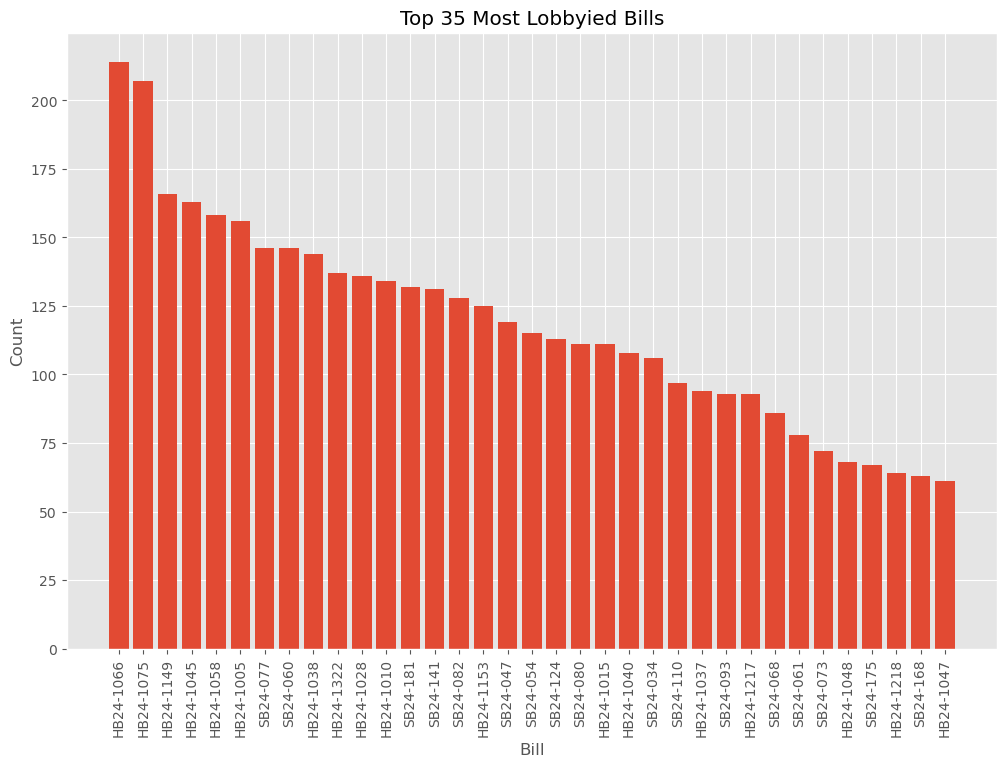

In [21]:
plt.style.use('ggplot')

# Figure setup
plt.figure(figsize=(12, 8))
# top most lobbyied bills and the counts
plt.bar(billsDF['Bill #'][:35],billsDF['Count'][:35])
plt.xlabel('Bill')
plt.ylabel('Count')
plt.title('Top 35 Most Lobbyied Bills')

plt.xticks(rotation=90)
plt.show()

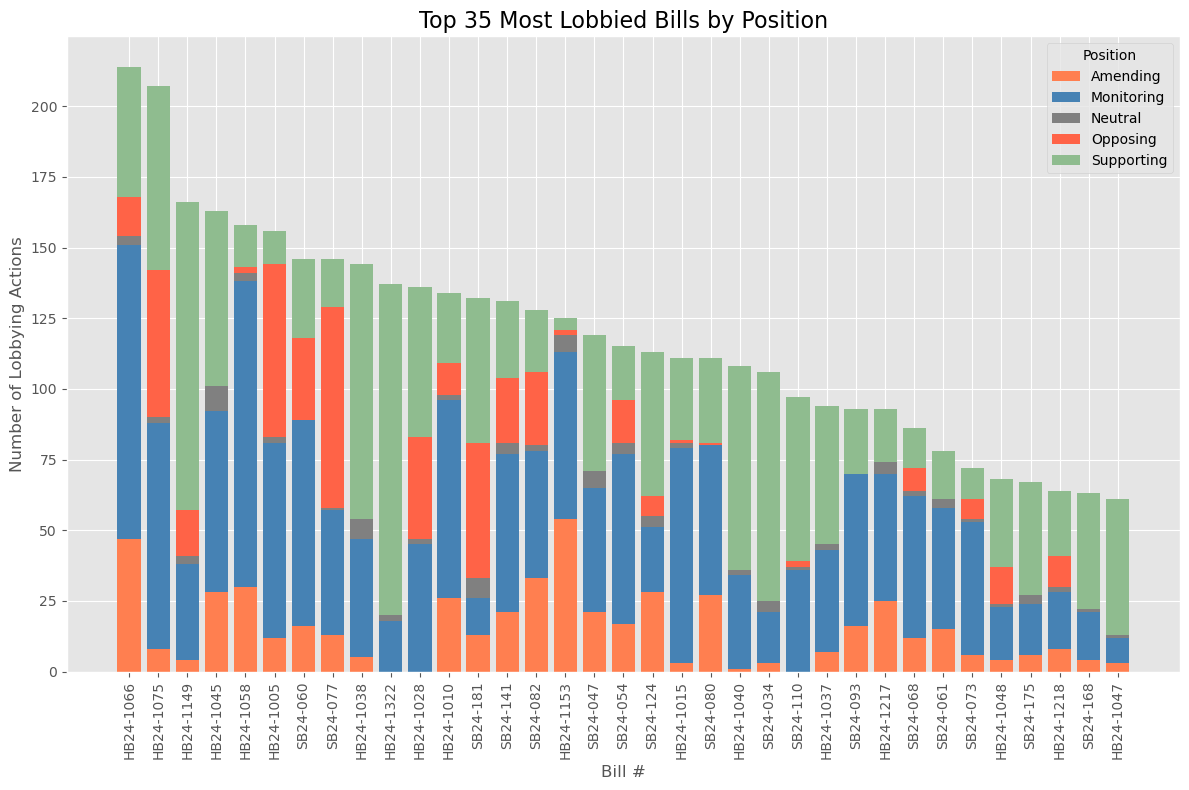

In [22]:
# Fill missing values with 'Neutral'
lobbyingDF['Position'] = lobbyingDF['Position'].fillna('Neutral')

# Group by bill and position, then count occurrences
lobbying_counts = lobbyingDF.groupby(['Bill #', 'Position']).size().reset_index(name='Count')

# Create a pivot table 
lobbying_pivot = lobbying_counts.pivot(index='Bill #', columns='Position', values='Count').fillna(0)

# Calculate total activity and sort the top 10 bills
lobbying_pivot['Total'] = lobbying_pivot.sum(axis=1)
top_bills = lobbying_pivot.sort_values(by='Total', ascending=False).head(35)

# Drop 'Total' column as it is not needed for plotting
top_bills = top_bills.drop(columns='Total')

# create color pallete
custom_colors = {
    'Supporting': 'darkseagreen',
    'Opposing': 'tomato',
    'Neutral': 'gray',
    'Monitoring': 'steelblue',
    'Amending': 'coral', 
}

# set plot size and style
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

# set up for stacking
bottom_value = [0] * len(top_bills)  

# Loop through each colums and create a stacked bar segment
for position in top_bills.columns:
    bar_color = custom_colors.get(position, 'gray')
    plt.bar(
        top_bills.index,
        top_bills[position],
        bottom=bottom_value,
        label=position,
        color=bar_color
    )
    bottom_value = [bv + val for bv, val in zip(bottom_value, top_bills[position])]

plt.title("Top 35 Most Lobbied Bills by Position", fontsize=16)
plt.xlabel("Bill #", fontsize=12)
plt.ylabel("Number of Lobbying Actions", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Position")
plt.tight_layout()
plt.show()


In [23]:
# sort pivot table by most support
lobbying_pivot.sort_values(by='Supporting', ascending=False).head(10)

Position,Amending,Monitoring,Neutral,Opposing,Supporting,Total
Bill #,,,,,,
HB24-1322,0.0,18.0,2.0,0.0,117.0,137.0
HB24-1149,4.0,34.0,3.0,16.0,109.0,166.0
HB24-1038,5.0,42.0,7.0,0.0,90.0,144.0
SB24-034,3.0,18.0,4.0,0.0,81.0,106.0
HB24-1040,1.0,33.0,2.0,0.0,72.0,108.0
HB24-1075,8.0,80.0,2.0,52.0,65.0,207.0
HB24-1045,28.0,64.0,9.0,0.0,62.0,163.0
SB24-110,0.0,36.0,1.0,2.0,58.0,97.0
HB24-1028,0.0,45.0,2.0,36.0,53.0,136.0


In [24]:
# sort pivot table by most opposition
lobbying_pivot.sort_values(by='Opposing', ascending=False).head(10)

Position,Amending,Monitoring,Neutral,Opposing,Supporting,Total
Bill #,,,,,,
SB24-077,13.0,44.0,1.0,71.0,17.0,146.0
HB24-1005,12.0,69.0,2.0,61.0,12.0,156.0
HB24-1075,8.0,80.0,2.0,52.0,65.0,207.0
SB24-181,13.0,13.0,7.0,48.0,51.0,132.0
HB24-1028,0.0,45.0,2.0,36.0,53.0,136.0
SB24-060,16.0,73.0,0.0,29.0,28.0,146.0
HB24-1106,0.0,7.0,1.0,29.0,5.0,42.0
SB24-082,33.0,45.0,2.0,26.0,22.0,128.0
SB24-141,21.0,56.0,4.0,23.0,27.0,131.0


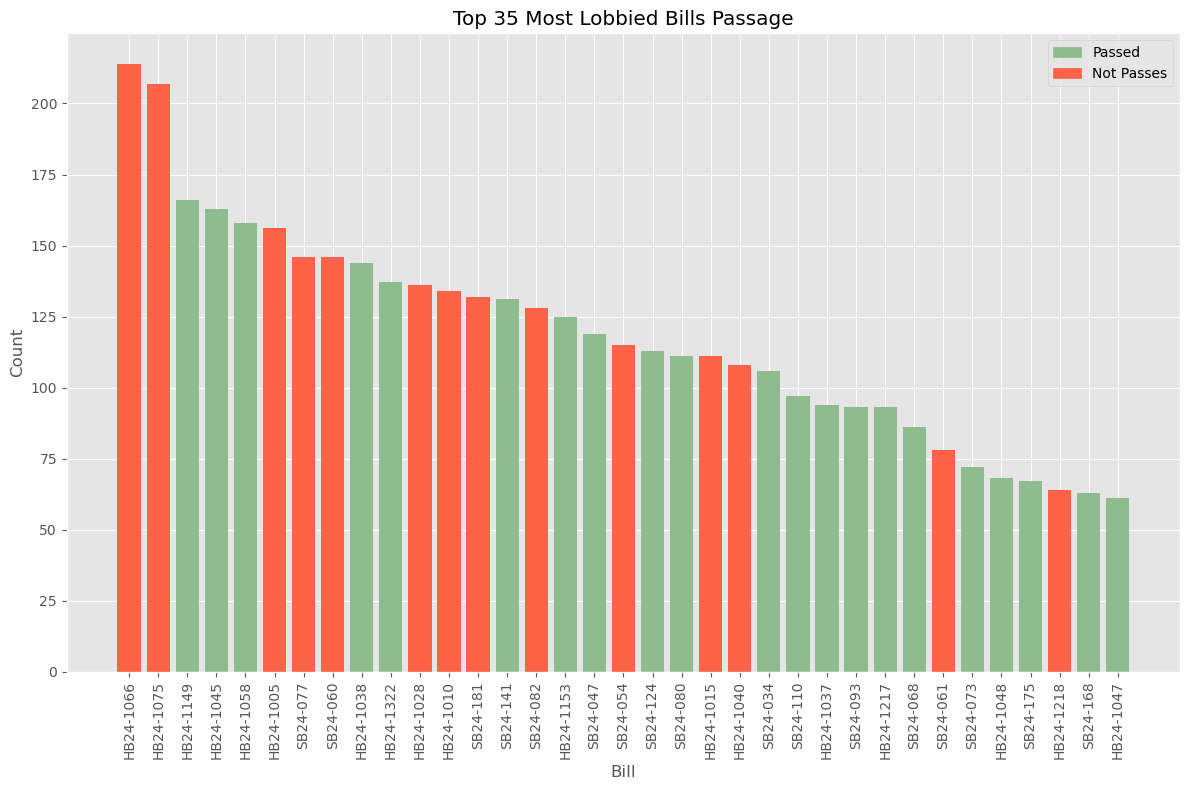

In [25]:
# Set up for color mapping
billsDF['approved'] = billsDF['approved'].astype(str)
billsDF['approved'] = billsDF['approved'].apply(
    lambda x: False if x.strip().lower() == "false" else True
)
# color map
color_map = ['darkseagreen' if val else 'tomato' for val in billsDF['approved'][:35]]

# set syle then plot 
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
plt.bar(
    billsDF['Bill #'][:35],
    billsDF['Count'][:35],
    color=color_map
)

plt.xlabel('Bill')
plt.ylabel('Count')
plt.title('Top 35 Most Lobbied Bills Passage')
plt.xticks(rotation=90)

# add legand
approved_patch = mpatches.Patch(color='darkseagreen', label='Passed')
not_approved_patch = mpatches.Patch(color='tomato', label='Not Passes')
plt.legend(handles=[approved_patch, not_approved_patch])
plt.tight_layout()
plt.show()


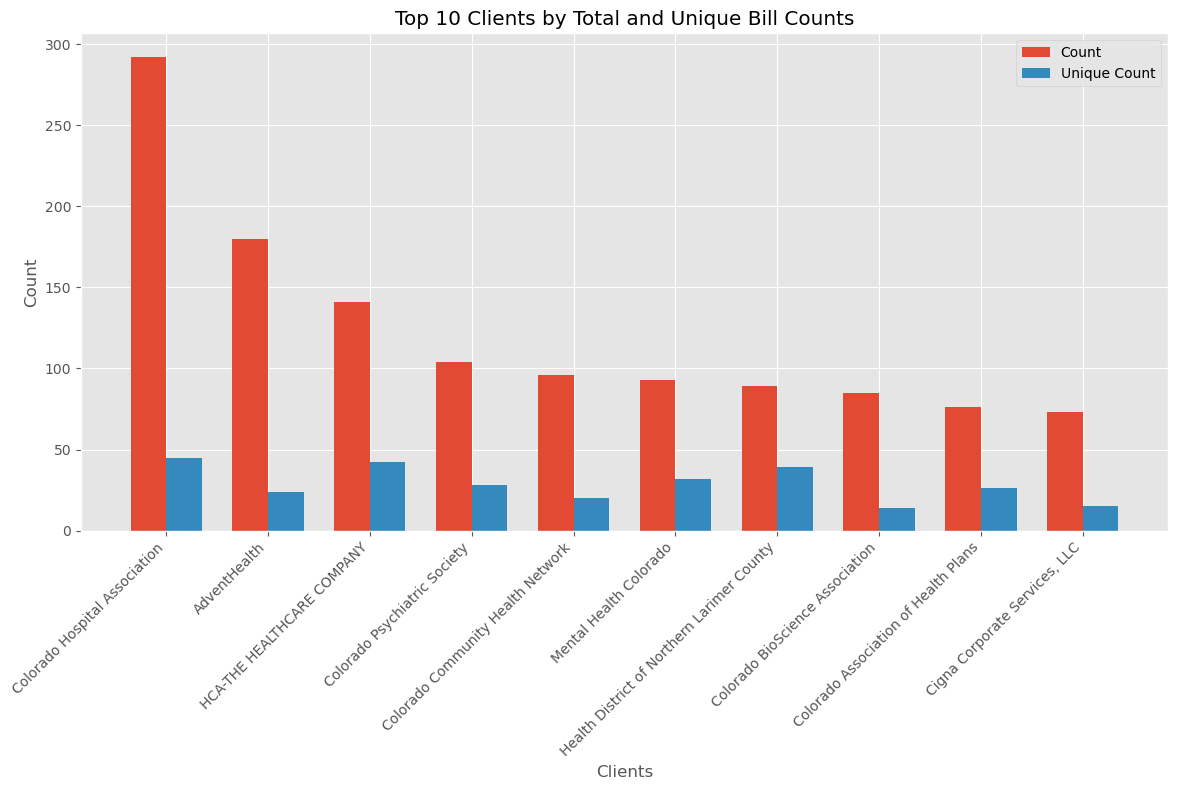

In [26]:
# set stlye
plt.style.use('ggplot')

# Figure setup
plt.figure(figsize=(12, 8))
bar_width = 0.35  
index = range(10)  

# Plot Total Count and Unique Count for Top 10 Clients
plt.bar(index, client_df['Count'][:10], bar_width, label='Count')
plt.bar([i + bar_width for i in index], client_df['Unique Count'][:10], bar_width, label='Unique Count')

# Add labels and title
plt.xlabel('Clients')
plt.ylabel('Count')
plt.title('Top 10 Clients by Total and Unique Bill Counts')

# Adjust x-ticks 
plt.xticks( [i + bar_width / 2 for i in index], client_df['Client'][:10],rotation=45, ha="right")
# Add legend
plt.legend()

# Layout adjustments
plt.tight_layout()

# Show the plot
plt.show()


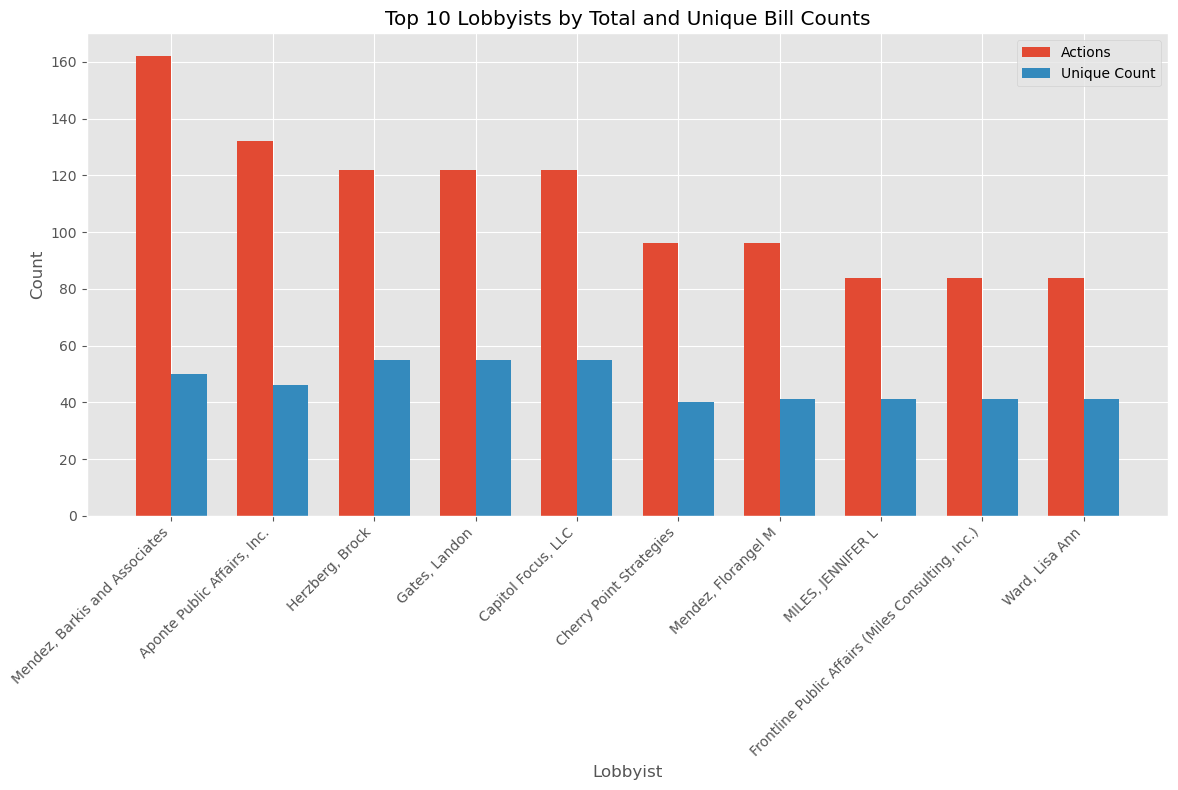

In [27]:
# set style
plt.style.use('ggplot')

# Figure setup
plt.figure(figsize=(12, 8))
bar_width = 0.35  
index = range(10) 

# Plot Total Count and Unique Count for Top 10 lobbyists
plt.bar(index, lobbyist_df['Count'][:10], bar_width, label='Actions')
plt.bar([i + bar_width for i in index], lobbyist_df['Unique Count'][:10], bar_width, label='Unique Count')

# Add labels and title
plt.xlabel('Lobbyist')
plt.ylabel('Count')
plt.title('Top 10 Lobbyists by Total and Unique Bill Counts')

# Adjust x-ticks for readability
plt.xticks([i + bar_width / 2 for i in index], lobbyist_df['Lobbyist'][:10], rotation=45, ha="right")

# Add legend
plt.legend()

# Layout adjustments
plt.tight_layout()

# Show the plot
plt.show()


Text(0.5, 1.0, 'Most Common Prime Sponsors on Bills')

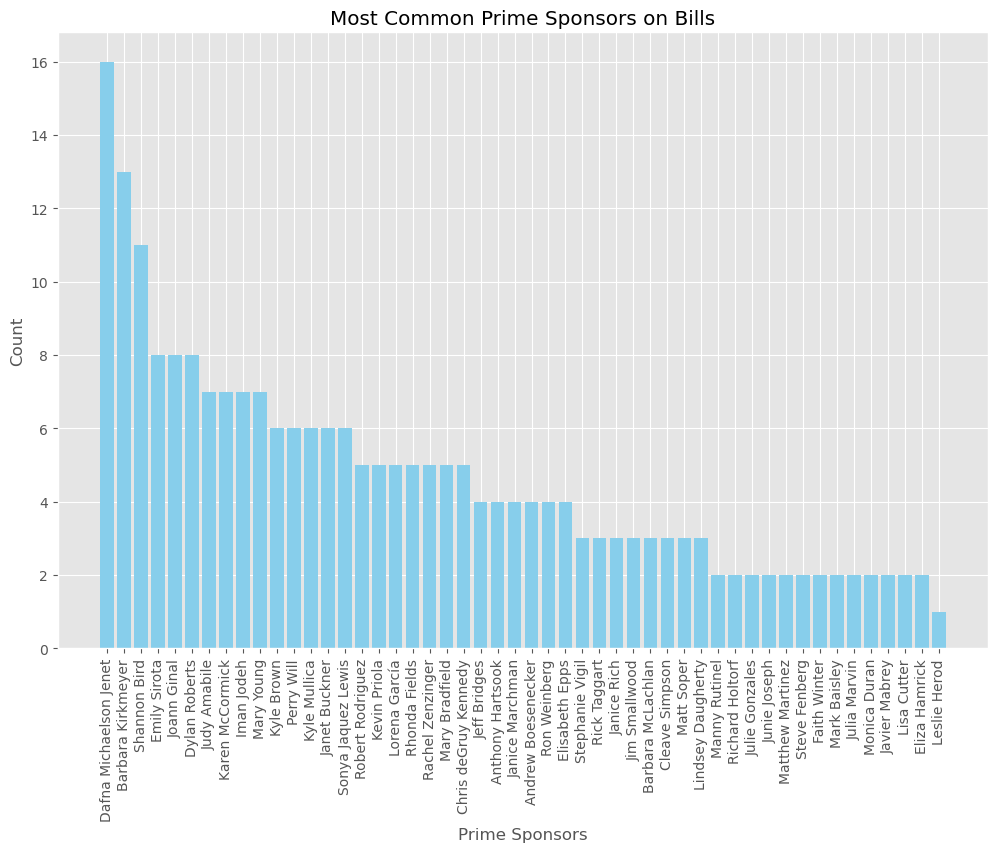

In [28]:
# split then explode 'primeSponsors' 
prime_sponsors_series = billsDF['primeSponsors'].str.split(',').explode()

# Clean the names
prime_sponsors_series = prime_sponsors_series.str.strip("[]' ")

# Count the occurrences
sponsor_counts = prime_sponsors_series.value_counts()

# Select the top prime sponsors
top_sponsors = sponsor_counts.head(50)

# Plot the counts
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
plt.bar(top_sponsors.index, top_sponsors.values, color='skyblue')
plt.xticks(rotation=90)
# Add labels and title
plt.xlabel('Prime Sponsors')
plt.ylabel('Count')
plt.title('Most Common Prime Sponsors on Bills')